In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
data = pd.read_csv('caso_full.csv',sep=',')
data.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,9,12252023.0,False,False,1,0.00816,2020-02-25,0.0,0,1,city,SP,1,0
1,NaN,35.0,2020-02-25,9,45919049.0,False,False,1,0.00218,2020-02-25,0.0,0,1,state,SP,1,0
2,São Paulo,3550308.0,2020-02-26,9,12252023.0,False,False,1,0.00816,2020-02-26,0.0,0,2,city,SP,0,0
3,NaN,35.0,2020-02-26,9,45919049.0,False,False,1,0.00218,2020-02-26,0.0,0,2,state,SP,0,0
4,São Paulo,3550308.0,2020-02-27,9,12252023.0,False,False,1,0.00816,2020-02-27,0.0,0,3,city,SP,0,0


In [3]:
# Total de registros na database completa
total_de_registros = len(data)
# O dataset deve ter registros das semanas epidemiológicas 9 à 32
# Esse é o primeiro registro com semana epidemiológica maior ou igual à 33
data.iloc[504773]

city                                                     NaN
city_ibge_code                                            17
date                                              2020-08-08
epidemiological_week                                      32
estimated_population_2019                        1.57287e+06
is_last                                                False
is_repeated                                            False
last_available_confirmed                               31663
last_available_confirmed_per_100k_inhabitants        2013.08
last_available_date                               2020-08-08
last_available_death_rate                             0.0142
last_available_deaths                                    451
order_for_place                                          144
place_type                                             state
state                                                     TO
new_confirmed                                            560
new_deaths              

In [4]:
# Fazer um slice do dataframe é muito mais rápido que percorrer todo o dataframe selecionando registros em que
# epidemiological_week é um valor x : 9<=x<=31
relevant_data = pd.DataFrame(columns=data.columns)
relevant_data = data.iloc[:504773]
relevant_data

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,São Paulo,3550308.0,2020-02-25,9,12252023.0,False,False,1,0.00816,2020-02-25,0.0000,0,1,city,SP,1,0
1,NaN,35.0,2020-02-25,9,45919049.0,False,False,1,0.00218,2020-02-25,0.0000,0,1,state,SP,1,0
2,São Paulo,3550308.0,2020-02-26,9,12252023.0,False,False,1,0.00816,2020-02-26,0.0000,0,2,city,SP,0,0
3,NaN,35.0,2020-02-26,9,45919049.0,False,False,1,0.00218,2020-02-26,0.0000,0,2,state,SP,0,0
4,São Paulo,3550308.0,2020-02-27,9,12252023.0,False,False,1,0.00816,2020-02-27,0.0000,0,3,city,SP,0,0
5,NaN,35.0,2020-02-27,9,45919049.0,False,False,1,0.00218,2020-02-27,0.0000,0,3,state,SP,0,0
6,São Paulo,3550308.0,2020-02-28,9,12252023.0,False,False,2,0.01632,2020-02-28,0.0000,0,4,city,SP,1,0
7,NaN,35.0,2020-02-28,9,45919049.0,False,False,2,0.00436,2020-02-28,0.0000,0,4,state,SP,1,0
8,São Paulo,3550308.0,2020-02-29,9,12252023.0,False,False,2,0.01632,2020-02-29,0.0000,0,5,city,SP,0,0
9,NaN,35.0,2020-02-29,9,45919049.0,False,False,2,0.00436,2020-02-29,0.0000,0,5,state,SP,0,0


In [5]:
# Removendo colunas:
relevant_data = relevant_data[['city','city_ibge_code','date','epidemiological_week','is_repeated','place_type','state','new_confirmed']].copy()
print(len(relevant_data))
relevant_data.head()

504773


,city,city_ibge_code,date,epidemiological_week,is_repeated,place_type,state,new_confirmed
0,São Paulo,3550308.0,2020-02-25,9,False,city,SP,1
1,NaN,35.0,2020-02-25,9,False,state,SP,1
2,São Paulo,3550308.0,2020-02-26,9,False,city,SP,0
3,NaN,35.0,2020-02-26,9,False,state,SP,0
4,São Paulo,3550308.0,2020-02-27,9,False,city,SP,0


In [6]:
# Selecionando apenas registros não repetidos referentes a cidades :
selected_data_cities = relevant_data[(relevant_data['place_type']=='city') & (relevant_data['is_repeated']==False)]
selected_data_cities = selected_data_cities.reset_index(drop=True)
# Removendo colunas irrelevantes :
selected_data_cities = selected_data_cities[['city','city_ibge_code','date','epidemiological_week','state','new_confirmed']].copy()
# --------------------------------
selected_data_cities.to_csv('Novos_Casos_Por_Cidade.csv',index=False)
print('Número de registros de cidades : ',len(selected_data_cities))
selected_data_cities.head()

Número de registros de cidades :  488766


,city,city_ibge_code,date,epidemiological_week,state,new_confirmed
0,São Paulo,3550308.0,2020-02-25,9,SP,1
1,São Paulo,3550308.0,2020-02-26,9,SP,0
2,São Paulo,3550308.0,2020-02-27,9,SP,0
3,São Paulo,3550308.0,2020-02-28,9,SP,1
4,São Paulo,3550308.0,2020-02-29,9,SP,0


In [7]:
# Selecionando apenas registros não repetidos referentes a estados :
selected_data_states = relevant_data[(relevant_data['place_type']=='state') & (relevant_data['is_repeated']==False)]
selected_data_states = selected_data_states.reset_index(drop=True)
# Removendo colunas irrelevantes :
selected_data_states = selected_data_states[['city_ibge_code','date','epidemiological_week','state','new_confirmed']].copy()
# --------------------------------
selected_data_states.to_csv('Novos_Casos_Por_Estado.csv',index=False)
print('Número de registros referentes a estados : ',len(selected_data_states))
selected_data_states.head()

Número de registros referentes a estados :  3952


,city_ibge_code,date,epidemiological_week,state,new_confirmed
0,35.0,2020-02-25,9,SP,1
1,35.0,2020-02-26,9,SP,0
2,35.0,2020-02-27,9,SP,0
3,35.0,2020-02-28,9,SP,1
4,35.0,2020-02-29,9,SP,0


In [8]:
# Para a unidade federativa dada como parâmetro, essa função seleciona apenas os registros do último dia de cada semana 
# epidemiológica.
def selecionar_dados_por_estado(dataframe,UF):
    selected_data = dataframe[(dataframe['state']==UF)]
    selected_data = selected_data.reset_index(drop=True)
    
    # Descobrindo em quais posições estão os registros do último dia de cada semana epidemiológica
    indices = []
    start = selected_data['epidemiological_week'][0]
    # Loop A:
    for i in range(len(selected_data)):
        if(selected_data['epidemiological_week'][i]>start):
            indices.append(i-1)
            start = selected_data['epidemiological_week'][i]
    
    # Gerando a saída
    output = pd.DataFrame(columns=selected_data.columns)
    # Loop B:
    for i in range(len(indices)):
        output = output.append(selected_data.iloc[indices[i]])
    # O Loop A não adiciona o índice referente ao registro do último dia da última semana epidemiológica
    # Logo fazemos falta adicionar esse registro no output, o que é feito com a linha de código imediatamente abaixo
    output = output.append(selected_data.iloc[-1])
    output = output.reset_index(drop=True)
    
    return output

,city_ibge_code,date,epidemiological_week,state,new_confirmed
0,31.0,2020-03-14,11,MG,2
1,31.0,2020-03-21,12,MG,17
2,31.0,2020-03-28,13,MG,16
3,31.0,2020-04-04,14,MG,33
4,31.0,2020-04-11,15,MG,52
5,31.0,2020-04-18,16,MG,56
6,31.0,2020-04-25,17,MG,62
7,31.0,2020-05-02,18,MG,88
8,31.0,2020-05-09,19,MG,180
9,31.0,2020-05-16,20,MG,278


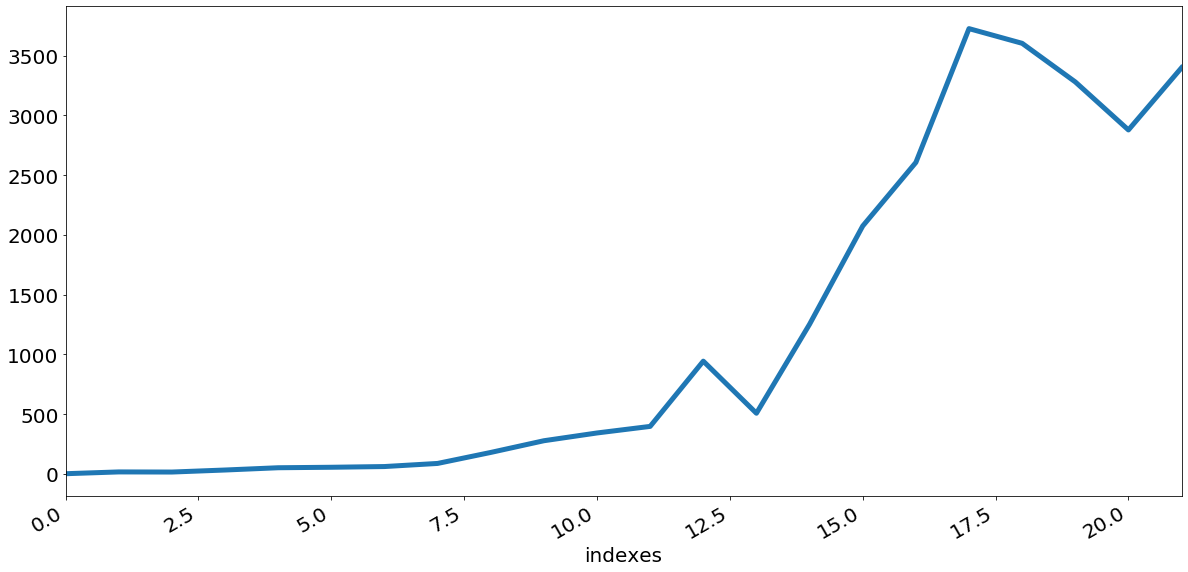

In [9]:
# Plotando Gráfico
selecionar_dados_por_estado(selected_data_states,'MG').new_confirmed.plot.line(figsize=(20,10), linewidth=5, fontsize=20,subplots=True)
plt.xlabel('indexes', fontsize=20);
# Exemplo de saída
selecionar_dados_por_estado(selected_data_states,'MG')

In [10]:
df = selected_data_states
selecionar_dados_por_estado(df,'AC').to_csv("Rz-Acre.csv",index=False)
selecionar_dados_por_estado(df,'AL').to_csv("Rz-Alagoas.csv",index=False)
selecionar_dados_por_estado(df,'AP').to_csv("Rz-Amapá.csv",index=False)
selecionar_dados_por_estado(df,'AM').to_csv("Rz-Amazonas.csv",index=False)
selecionar_dados_por_estado(df,'BA').to_csv("Rz-Bahia.csv",index=False)
selecionar_dados_por_estado(df,'CE').to_csv("Rz-Ceará.csv",index=False)
selecionar_dados_por_estado(df,'DF').to_csv("Rz-Distrito Federal.csv",index=False)
selecionar_dados_por_estado(df,'ES').to_csv("Rz-Espírito Santo.csv",index=False)
selecionar_dados_por_estado(df,'GO').to_csv("Rz-Goiás.csv",index=False)
selecionar_dados_por_estado(df,'MA').to_csv("Rz-Maranhão.csv",index=False)
selecionar_dados_por_estado(df,'MT').to_csv("Rz-Mato Grosso.csv",index=False)
selecionar_dados_por_estado(df,'MS').to_csv("Rz-Mato Grosso do Sul.csv",index=False)
selecionar_dados_por_estado(df,'MG').to_csv("Rz-Minas Gerais.csv",index=False)
selecionar_dados_por_estado(df,'PA').to_csv("Rz-Pará.csv",index=False)
selecionar_dados_por_estado(df,'PB').to_csv("Rz-Paraíba.csv",index=False)
selecionar_dados_por_estado(df,'PR').to_csv("Rz-Paraná.csv",index=False)
selecionar_dados_por_estado(df,'PE').to_csv("Rz-Pernambuco.csv",index=False)
selecionar_dados_por_estado(df,'PI').to_csv("Rz-Piauí.csv",index=False)
selecionar_dados_por_estado(df,'RJ').to_csv("Rz-Rio de Janeiro.csv",index=False)
selecionar_dados_por_estado(df,'RN').to_csv("Rz-Rio Grande do Norte.csv",index=False)
selecionar_dados_por_estado(df,'RS').to_csv("Rz-Rio Grande do Sul.csv",index=False)
selecionar_dados_por_estado(df,'RO').to_csv("Rz-Rondônia.csv",index=False)
selecionar_dados_por_estado(df,'RR').to_csv("Rz-Roraima.csv",index=False)
selecionar_dados_por_estado(df,'SC').to_csv("Rz-Santa Catarina.csv",index=False)
selecionar_dados_por_estado(df,'SP').to_csv("Rz-São Paulo.csv",index=False)
selecionar_dados_por_estado(df,'SE').to_csv("Rz-Sergipe.csv",index=False)
selecionar_dados_por_estado(df,'TO').to_csv("Rz-Tocantins.csv",index=False)